# NHST II: Test Statistics
We have now reached a point where most of the logic of NHST has been established. To review, we begin by determining what value our parameter of interest would have under the null hypothesis of no effect. We can then compare that value to the actual value we have calculated to produce a *difference* that we have called $\delta$. Using the theoretical sampling distribution of $\delta$, we can establish the probability of this value having occurred *if the null hypothesis were true*. The smaller this probability, the less compatible our data is with the proposed null value. If the probability gets small enough, we can take this as evidence *against* the null hypothesis.

## The Logic of Test Statistics

Although we have yet to define precisely how to use probability in the method above, we first need to discuss some practical limitations of calculating probability directly from the distribution of $\delta$:

- With our current method, we need to construct a new null distribution for every data analysis because the distribution of $\delta$ depends upon both the units of our measurements and the standard error. Because of this, the procedure is not very *generalisable*, as we have to start from scratch with each new analysis.  
- We also cannot compare values of $\delta$ across diffeerent studies, because $\delta$ is only interpretable within the context of the current analysis.
- In terms of making the process practical, we would require the probabilities associated with unique distributions of $\delta$ to be calculated manually each time. Although less problematic now with computers, in the past this would have been a very impractical recommendation. 

For all these reasons, it is typical to transform $\delta$ into a standardised value known as a *test statistic*. In doing so, we are able to turn a messy and context-specific procedure into a universally interpretable process for inference.

## The $z$-statistic
The first method we can use to standardise $\delta$ is to divide it by its *standard error*. This produces a value that we will call $z$

$$
z = \frac{\delta}{\sqrt{\text{Var}(\delta)}}.
$$

This *scales* $\delta$ into units of standard error. We can think of this as the magnitude of $\delta$, expressed in terms of the number of standard errors the deviation represents. As an example, if $\delta = 6$ and $\sqrt{\text{Var}(\delta)} = 3$, then $z = \frac{6}{3} = 2$. In this situation, the average deviation from 0 is 3, so a $\delta$ of 6 represents 2 of those average deviations. In other words, the magnitude of $\delta$ is 2 standard errors away from 0. Because both the numerator and denominator of this caclulation have the same units, they effectively cancel and we end up with a *unitless* quantity. So, irrespective of the original units that we measured, we can transform $\delta$ into a quantity that can be compared and intepreted across studies. In our current example of testing a regression slope against 0, we therefore have

$$
z = \frac{\delta}{\sqrt{\text{Var}(\delta)}} = \frac{\hat{\beta}_{1} - \beta_{1}^{(0)}}{\sqrt{\text{Var}\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\right)}} = \frac{\hat{\beta}_{1}}{\text{SE}\left(\hat{\beta}_{1}\right)} = \frac{\hat{\beta}_{1}}{\sqrt{\frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}}}.
$$

The denominator is often rearranged and written as

$$
z = \frac{\hat{\beta}_{1}}{\sigma / \sqrt{\sum{(x_{i} - \bar{x})^{2}}}}.
$$

Either way, we are simply dividing the estimate by its standard error to produce a quantity that expresses $\delta$ in units of standard error. The larger $z$ is, the larger $\delta$ is, relative to its standard error. This is useful for interpretation, because the same value of $\delta$ across different experiments may result in different values of $z$, depending upon the degree of uncertainty. This helps our previous eye-balling of each estimate in relation to its standard error by turning it into a single number. For instance, $\delta = 5$ would be interpreted very differently if the SE was 2 compared to 10. In the first case, the difference is 2.5 times the standard error, meaning $\delta$ is going to be out in the tails of its distribution. In the second case, the difference is *half* a standard error, meaning $\delta$ is going to be within the main density of its distribution. 

Beyond, just changing the interpretation of $\delta$, conversion to a $z$-statistic also changes its distribution under the null. Importantly, in the expression for $z$ above, we have used $\sigma^{2}$, *not* $\hat{\sigma}^{2}$. So this is based on knowing the population variance, which does not seem particularly useful given that we do *not* know this. However, sometimes assumptions have to be made in order to make progress, so we will stick with this and then address it in more detail below. The main utility in assuming $\sigma^{2}$ is known is that the denominator of $z$ become a *constant*. If we assume that replicating the same expriment involves that same number of data points measured using the same values of $x$, then the standard error of the estimate becomes a fixed quantity. Given that the numerator here is just $\hat{\beta}_{1}$ and we known that this is normally distributed, all $z$ is doing is dividing a normal random variable by a constant. This does not change the *shape* of the distribution, it only changes the units. Because $E(\delta|\mathcal{H}_{0}) = 0$, this will not change, as dividing 0 by anything still equals 0. However, the standard error of the distribution of $z$ becomes

$$
\text{SE}\left(\frac{\delta}{\text{SE}(\delta)}\right) = \frac{\text{SE}(\delta)}{\text{SE}(\delta)} = 1.
$$

From this, the distribution of $z$ must be

$$
z \sim \mathcal{N}\left(0,1\right),
$$

which is known as a *standard normal distribution*. We can see that this conversion works, irrespective of the scale of the original data, using an example in `R`. The output below shows 6 examples of generating some data using a random mean and a random standard deviation. This data is then *standardised* by mean-centering it (to make the mean 0) and dividing by its standard deviation. The resultant distribution is then shown, with a standard normal curve over the top.

In [1]:
options(repr.plot.width=14, repr.plot.height=12)

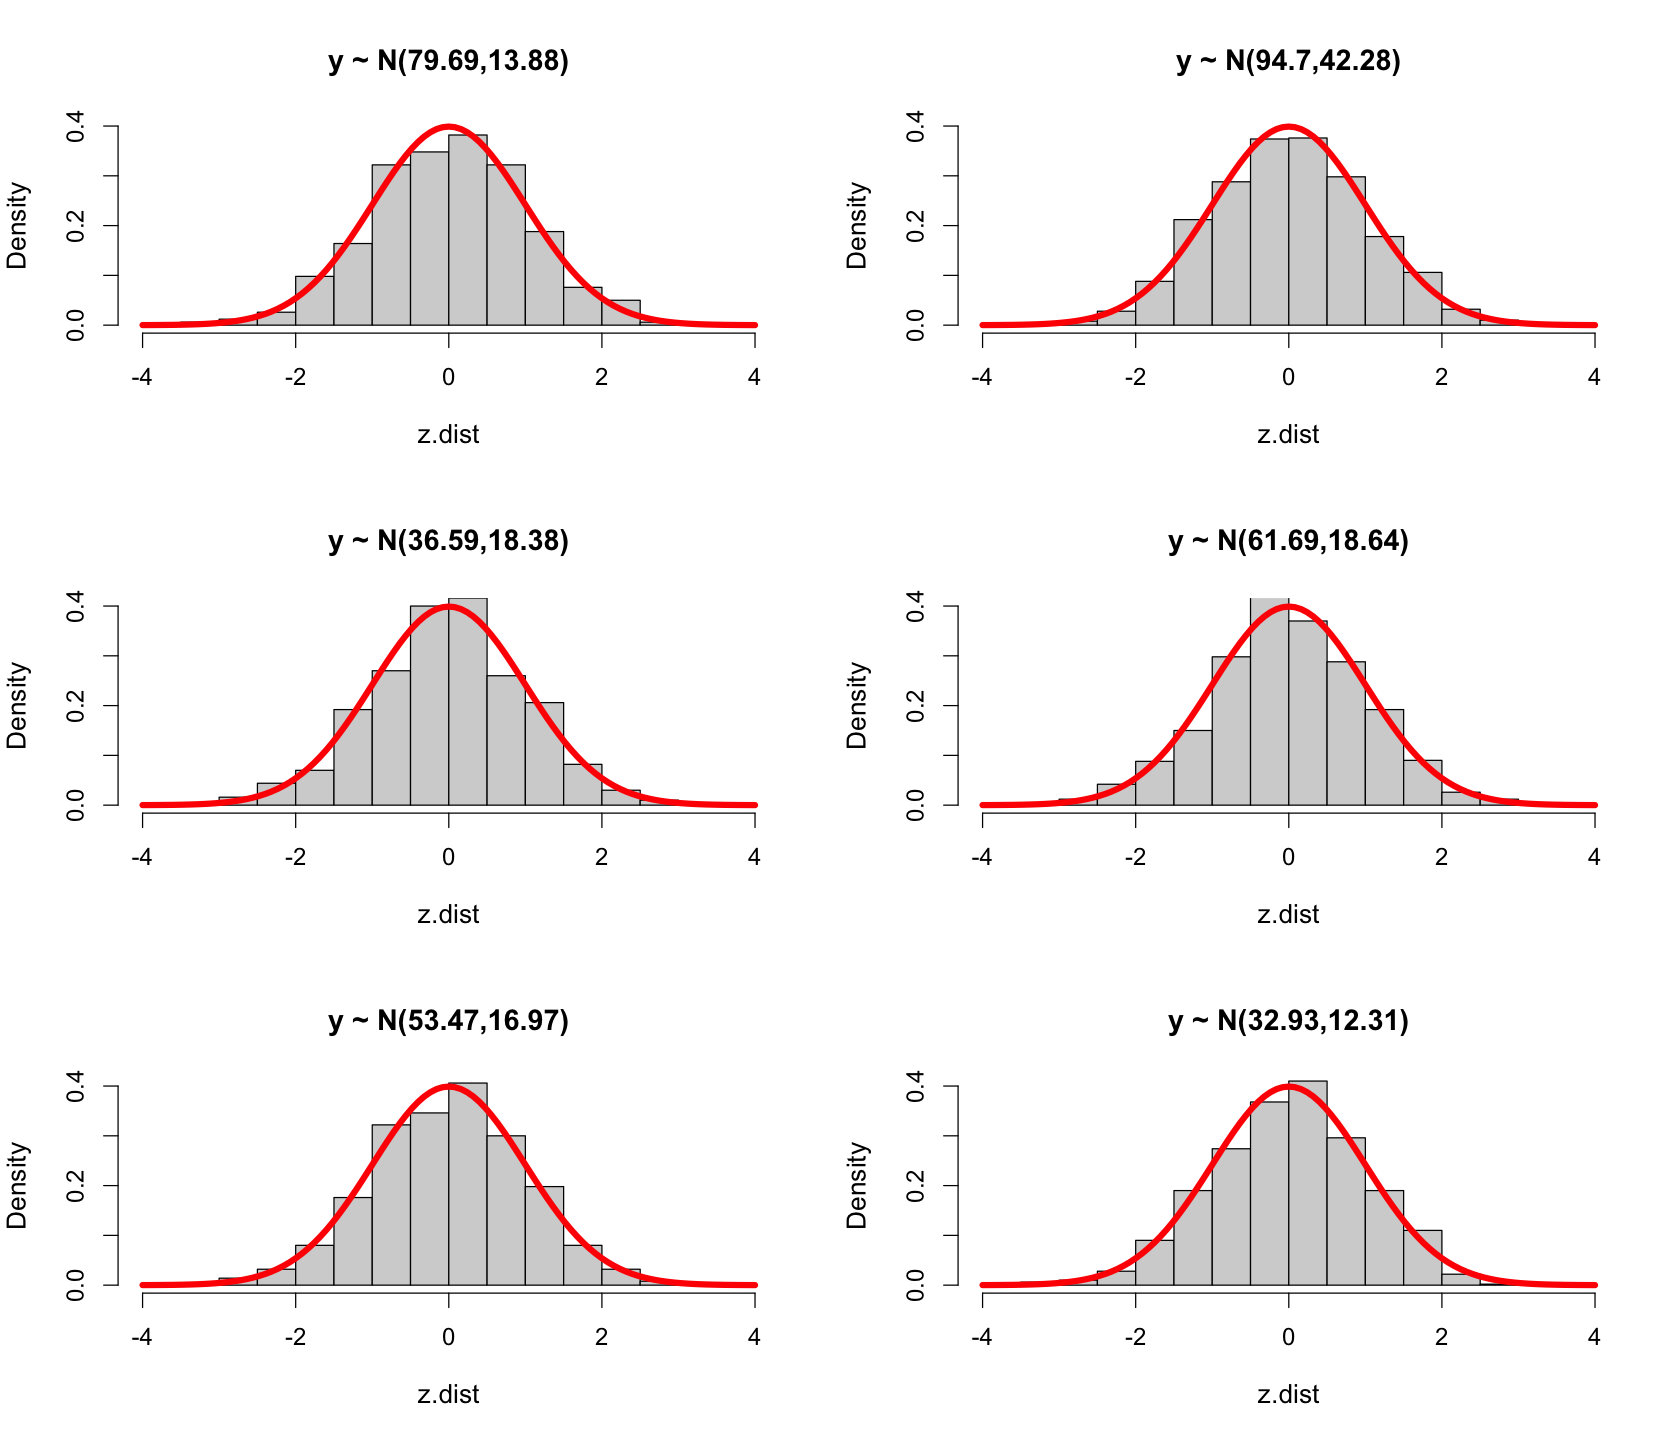

In [31]:
par(mfrow=c(3,2))
set.seed(666)

for (i in 1:6){
    rand.mu <- runif(1, min=10, max=100)
    rand.sd <- runif(1, min=5,  max=50)
    rand.y  <- rnorm(1000, mean=rand.mu, sd=rand.sd)
    z.dist  <- (rand.y - mean(rand.y)) / sd(rand.y)
    title   <- paste0("y ~ N(",round(rand.mu,2),",",round(rand.sd,2),")")

    # plot scaling  
    par(cex.lab=1.1, cex.axis=1, cex=1.2) 
    
    # Histogram of z-transformed data
    hist(z.dist, main=title, probability=TRUE, ylim=c(0,0.4), xlim=c(-4,4))
    
    # Add a standard normal density curve
    curve(dnorm(x, mean=0, sd=1), col="red", lwd=5, add=TRUE)  
}

The point of all this is to show that, no matter the original units of our data, we can calculate a $z$-statistic that we *know* has a standard normal distribution under the null. So, rather than having to work out the distribution of $\delta$ each time, we can just turn $\delta$ into $z$ and work with the standard normal distribution. So, we get an easy to interpret metric of the magnitude of $\delta$ and can pre-compute probabilities to be used with *any* dataset. Indeed, in the past, this is exactly what was done. Statistical texts would contain tables of probabilities for different values of $z$. This meant that the working statistician could simply look-up the closest $z$-value in the table and would know the probaility of that value under the null hypothesis, rather than having to compute it manually. From here, a decision could be made about whether the calculated value of $z$ was *compatible* or *incompatible* with the hypothesised null value.

## The $t$-statistic
In the previous section, we saw that the calculation of $z$ depended upon knowing $\sigma^{2}$. However, in practise, we do not known $\sigma^{2}$. Instead, we have an estimated value, denoted $\hat{\sigma}^{2}$. So how does that change things? For our current example, we can plug-in an estimate like so

$$
\widehat{\text{SE}}\left(\delta\right) = \sqrt{\widehat{\text{Var}}\left(\hat{\beta}_{1}\right)} = \sqrt{\frac{\hat{\sigma}^{2}}{(n-1)\sigma^{2}_{x}}}
$$

and we have calculated a value for the standard error of $\delta$. However, what we have done here is replaced the *constant* $\sigma^{2}$ with the *random variable* $\hat{\sigma}^{2}$. In effect, we have *estimated* the variance of our estimate, meaning that our calculated standard error is now also a *random variable*. This means that we will be introducing additional randomness into the calculation of $z$, because the standard error will change with each sample. This means that the denominator of the test statistic is no longer a constant that simple scales the distribution. Instead, we are now dividing a *random variable* by *another random variable*.

So what happens when we do this? Well, the denominator of $z$ served to scale $\delta$ into standard units.
However, the range of standardised values we get will change depending on how variable the denominator is. When the denominator is constant, this does not matter. However, when this value is *not* constant, this range changes *dynamically*. So rather than having a distribution with a fixed-width, such as the standard normal, you end up with a distribution that changes its width *dynamically*. How this width changes depends upon the precision of our estimate of the standard error. The *less* precision, the more we expect extreme value of $z$ to occur. This is because we will get more *underestimates* and more *overestimates* of the true value of the standard error. This means that both *smaller* and *larger* test statistic values will occur by chance. This will be reflected in a null distribution that is *wider* than a standard normal. So, as the precision of our estimate of the standard error *increases*, we would expect the width of the null distribution to *decrease* as we get fewer extreme values of the test statistic. So what governs this precision? As we saw earlier with the estimate of $\beta_{1}$, the precision of our estimate is governed by the *sample size*. 

When we divide $\delta$ by an *estimate* of $\sqrt{\text{Var}\left(\delta\right)}$, we denote the resultant value as $t$, rather than $z$

$$
t = \frac{\delta}{\sqrt{\widehat{\text{Var}}\left(\delta\right)}},
$$

which, as we saw earlier, will often be denoted as

$$
t = \frac{\hat{\beta}_{1}}{\hat{\sigma} / \sqrt{\sum{(x_{i} - \bar{x})^{2}}}}.
$$

The corresponding null distribution for this $t$-statistic is, unsurprisingly, known as the $t$-distribution. As discussed above, given the uncertainty in the estimation of the denominator of the $t$-statistic, the $t$-distribution is able to dynamically reshape its width using a single parameter denoted $\nu$, known more generally as the *degrees of freedom*. The value of $\nu$ is directly informed by the sampling distribution of variance estimate. So, rather than having a fixed shape like a standard normal distribution, the $t$-distribution can grow fatter or thinner, depending upon the properties of the denominator. Previously in this lesson, we touched-upon the sampling distribution of $\hat{\sigma}^{2}$ in simple regression, mentioning that it had a scaled $\chi^{2}$ distribution with parameter $k = n - 2$. This parameter is *exactly* the degrees of freedom that controls the shape of the $t$-distribution. In effect, this reflects the uncertainty in estimation due to the sample size and thus directly controls the width of the null $t$-distribution, as illustrated below. 

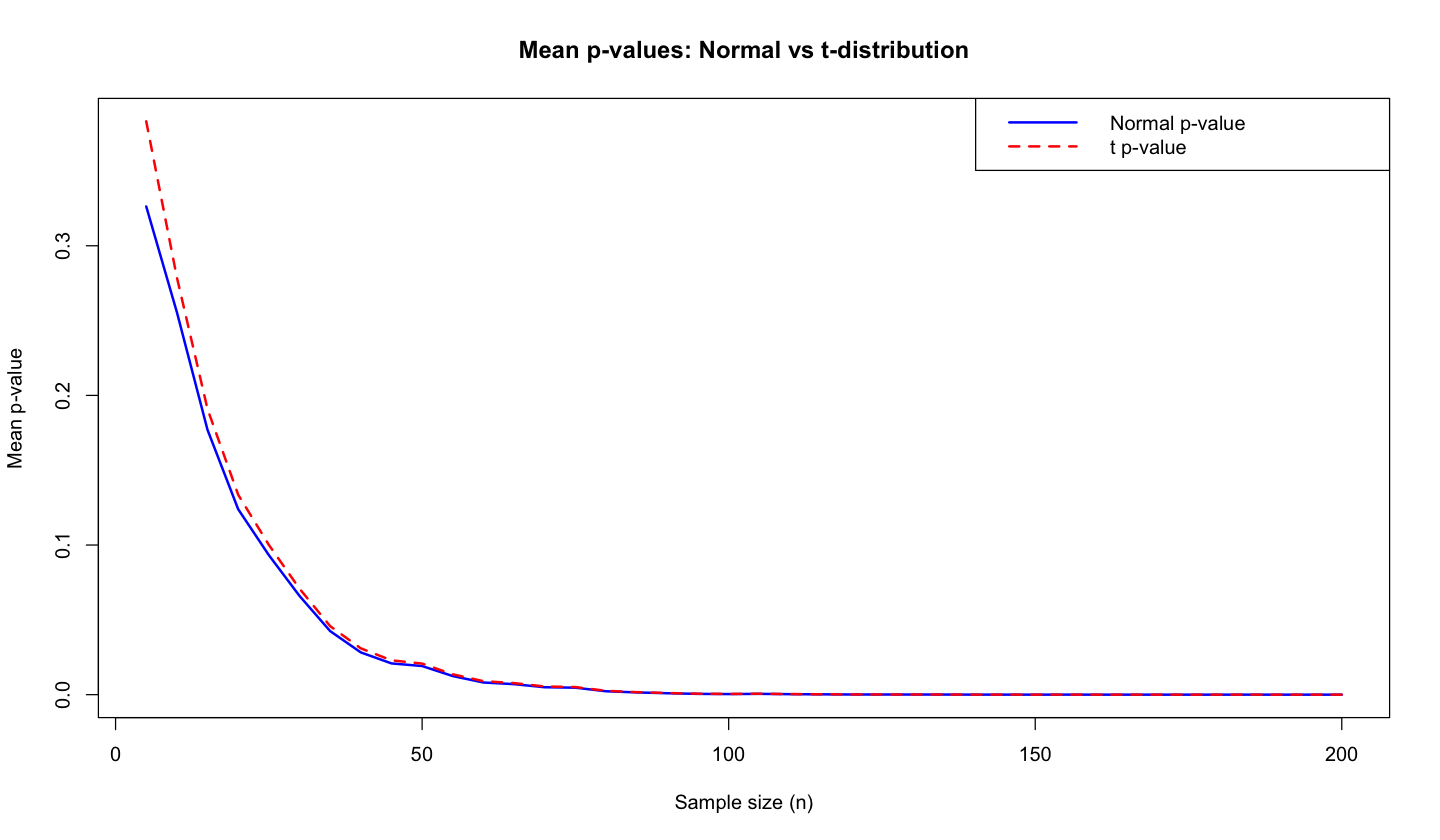

In [4]:
set.seed(123)

# Parameters
beta_0 <- 0
beta_1 <- 0.5
sigma <- 1
n_vals <- seq(5, 200, by = 5)
n_reps <- 1000

# Store results
p_norm_mat <- numeric(length(n_vals))
p_t_mat    <- numeric(length(n_vals))

for (j in seq_along(n_vals)) {
  n <- n_vals[j]
  p_norms <- numeric(n_reps)
  p_ts    <- numeric(n_reps)
  
  for (i in 1:n_reps) {
    x <- rnorm(n)
    y <- beta_0 + beta_1 * x + rnorm(n, sd = sigma)
    
    fit <- lm(y ~ x)
    est <- coef(fit)["x"]
    se  <- summary(fit)$coefficients["x", "Std. Error"]
    df  <- df.residual(fit)
    
    # P-value using normal distribution (directly from sampling distribution of estimate)
    p_norms[i] <- 2 * pnorm(abs(est), mean = 0, sd = se, lower.tail = FALSE)
    
    # P-value using t-distribution
    t_stat <- est / se
    p_ts[i] <- 2 * pt(abs(t_stat), df = df, lower.tail = FALSE)
  }
  
  # Save mean p-values for this sample size
  p_norm_mat[j] <- mean(p_norms)
  p_t_mat[j]    <- mean(p_ts)
}

# Plotting with base R
plot(n_vals, p_norm_mat, type = "l", lwd = 2, col = "blue",
     ylim = range(c(p_norm_mat, p_t_mat)), xlab = "Sample size (n)",
     ylab = "Mean p-value", main = "Mean p-values: Normal vs t-distribution")
lines(n_vals, p_t_mat, lwd = 2, col = "red", lty = 2)
legend("topright", legend = c("Normal p-value", "t p-value"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


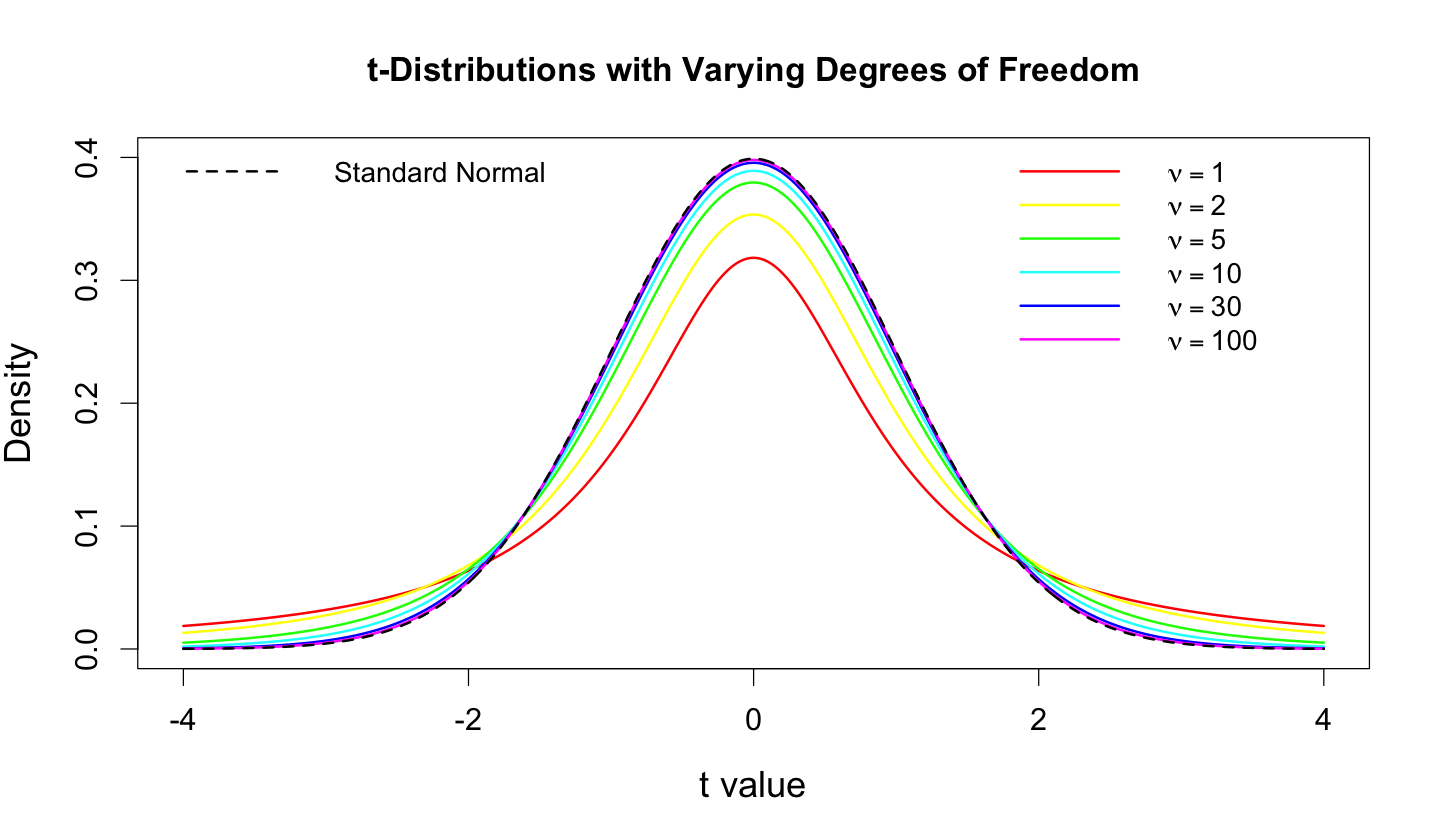

In [5]:
# Set up the x-axis range
x <- seq(-4, 4, length.out = 500)

# Define degrees of freedom to compare
dfs <- c(1, 2, 5, 10, 30, 100)

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Set up plot
plot(x, dt(x, df = 1), type = "n", ylim = c(0, 0.4),
     xlab = "t value", ylab = "Density",
     main = "t-Distributions with Varying Degrees of Freedom")

# Define a color palette
colors <- rainbow(length(dfs))

# Add lines for each t-distribution
for (i in seq_along(dfs)) {
  lines(x, dt(x, df = dfs[i]), col = colors[i], lwd = 2)
}

# Add standard normal distribution for reference
lines(x, dnorm(x), col = "black", lwd = 2, lty = 2)

# Add legend
labels <- paste0("nu == ", dfs)
legend("topright", 
      legend=parse(text=labels),
      col=colors, 
      lwd=2, 
      bty="n")

legend("topleft", legend = "Standard Normal", col = "black", lty = 2, lwd = 2, bty = "n")


Importantly, we can still interpret the value of $t$ as $\delta$ in units of standard error. The difference is just that when $n$ is small, the null distribution has *fatter tails*, reflecting the fact that more extreme values of $t$ are more likely under the null. This is important because, without this dynamic resizing, we would calculate the *wrong probability* of $\delta$ in small samples, overestimating how rare large values actually are.

An important result here is that as $n \rightarrow \infty$, the $t$-distribution converges on the normal distribution. This is because the scaling introduced by the degrees of freedom starts to have no effect. If we therefore wanted to ignore the fact that $\hat{\sigma}^{2}$ was an estimate, we could say that our test statistic is *asymptotically* normally distributed. In other words, as $n$ approaches infinity, this is correct. Of course, this is only sensible mathematically, as we will never have an *infinite* sample size. However, for practical purposes, this just means that the *larger* the sample size, the more we can trust this simplification. As we can see above, when $\nu > 100$ the $t$-distribution becomes practically indistinguishable from the standard normal distribution. Although this may seem a strange thing to do, later in the course we will be exmaining models where the concepts of degrees of freedom breaks down. When this happens, the models will tend to report $z$-statistics and rely on an asymptotically correct null distribution.


```{admonition} Student and the History of the $t$-statistic
:class: tip
... The additional uncertainty added by using an estimate of the variance in small samples was not always appreciated by statistians. Indeed, before the publication by Student in 1908, statisticans would just use $z$-statistics and assume that the estimate of the variance could just be used as a close approximation of the population value, calculating probabilities from a standard normal distribution. The paper titled [The Probable Error of a Mean](https://www.jstor.org/stable/2331554) changed this thinking and introduced the world to the concept of the $t$-statistic and the $t$-distribution. The author was named [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset), who was a statistician working for Guinness. Due to previous disclosure of trade secrets through scientific publication, Guinness only allowed their staff to publish on condition that they did not mention

1. Beer
2. Guinness
3. Their own surname

As such, Gosset published his work on the $t$-distribution under the pseudonym "Student". Because of this, the null distribution is still often referred to as "Student's $t$-distribution". However, the usefulness of Gosset's results were not full appreciated by the statistical field until Fisher was developing his own methods several years later. Indeed, it was Fisher, in a [series of letters](https://www.jstor.org/stable/2683142?origin=crossref), who corrected Gosset's derivation by indicating that the divisor should be the *degrees of freedom*, not the total sample size (as originally thought). This also shows that the concept of degrees of freedom was not intuitive to statisticians either and were a controversial topic when [first introduced](https://www.jstor.org/stable/2340521?seq=1) by Fisher.  
```

## Other Test Statistics
There are many more test statistics in the world beyond the $z$-statistic and the $t$-statistic. As we move forward on this course, we will see other test statistics introduced. In all cases, the logic of using the statistic is the same. Whatever our null hypothesis may be, we want to place the calculated discrepancy from the null on a standardised scale that can be understood by anyone, irrespective of the original units of the data. Ideally, the null distribution of this statistic should be dynamic to reflect uncertainty in the estimation of the standard error. However, it is also possible to use statistics that are *asymptotically* correct. The former is appropriate for use with any sample size whereas the latter requires either a large sample, or additional caution in small samples.

`````{topic} What do you now know?
In this section, we have explored the concept of the test statistic. After reading this section, you should have a good sense of:

- Why it is more practical to turn our raw difference $\delta$ in a standardised value, to allow for easier interpretation and, historically, easier calculation of probabilities.
- The logic behind the $z$-statistic, which divides $\delta$ by its standard error, rescaling $\delta$ into standard error units. 
- The idea that this rescaling alters the distribution of $\delta$ such that $z$ follows a standard normal distribution under the null, irrespective of the original units of the data.
- The idea that the $z$-statistic is based on assuming that $\sigma^{2}$ is known, when in reality we almost always have to *estimate* this value.
- The principle that when we *estimate* the variance (and thus estimate the standard error), the resultant test statistic is known as a $t$-statistic and follows a $t$-distribution under the null.
- The concept that the $t$-distribution is able to flexibly adapt to the uncertainty in the estimation of the standard error by altering its width, as governed by its *degrees of freedom*.
`````